### Jacobian Functional Form Analysis

In [ ]:

# graph neural network 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


import rootutils
root = rootutils.setup_root("./scripts/", dotenv=True, pythonpath=True,  indicator =  [".project-root"], cwd = True)


from scripts.nb_functions import find_filtered_voronoi_neighbor_knn_limited_mask


<function scripts.nb_functions.find_filtered_voronoi_neighbor_knn_limited_mask(points, n_neighbors=8)>

In [99]:

positions = []

data = []

for i in range(10):
    positions.append(np.load(f"positions/random_{i}_positions.npy"))
    SMAD_ERK = np.load(f"positions/random_{i}_SMAD_and_ERK.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.

    d = SMAD_ERK[:201,:,:]

    # normalize the two channels independently
    d[:,:,0] = (d[:,:,0] - np.min(d[:,:,0])) / (np.max(d[:,:,0]) - np.min(d[:,:,0]))
    d[:,:,1] = (d[:,:,1] - np.min(d[:,:,1])) / (np.max(d[:,:,1]) - np.min(d[:,:,1]))
    data.append(d)
    # print(d.shape)
data = data[0]

# find_filtered_voronoi_neighbor_knn_limited_mask

nbs = find_filtered_voronoi_neighbor_knn_limited_mask(positions[0], 8)[0]
nb_mask = nbs >= 0

In [77]:
data.shape

(201, 1000, 2)

In [105]:
S = data[:, :, 0]
E = data[:, :, 1]

print(E.shape)
dS = np.diff(S, axis=0)
dE = np.diff(E, axis=0)

nbsS = [S[:,nbs[i][nb_mask[i]]].mean(axis = 1) for i in range(len(nbs))]
nbsS = np.array(nbsS).T

nbsE = [E[:,nbs[i][nb_mask[i]]].mean(axis = 1) for i in range(len(nbs))]
nbsE = np.array(nbsE).T




(201, 1000)


In [104]:
nbsE.shape

(201, 1000)

In [ ]:
S.shape


(201, 1000)

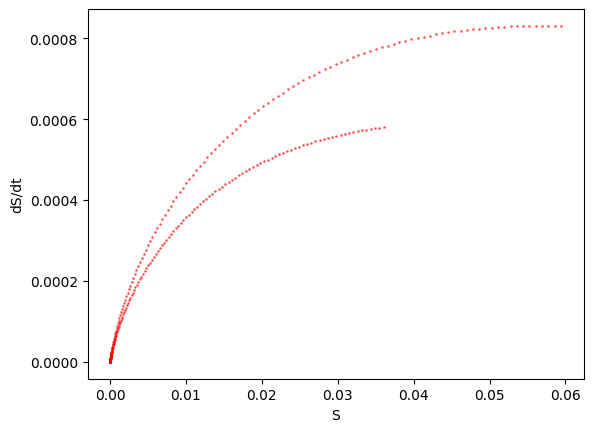

In [61]:
plt.scatter(S[:-1, 0], dS[:, 0], c='r', s=1, alpha=0.5)
plt.scatter(S[:-1, 10], dS[:, 10], c='r', s=1, alpha=0.5)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("S")
plt.ylabel("dS/dt")
plt.show()

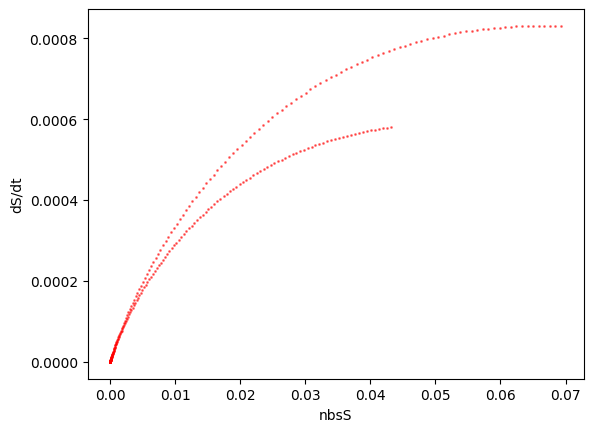

In [107]:
plt.scatter(nbsS[:-1, 0], dS[:, 0], c='r', s=1, alpha=0.5)
plt.scatter(nbsS[:-1, 10], dS[:, 10], c='r', s=1, alpha=0.5)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("nbsS")
plt.ylabel("dS/dt")
plt.show()

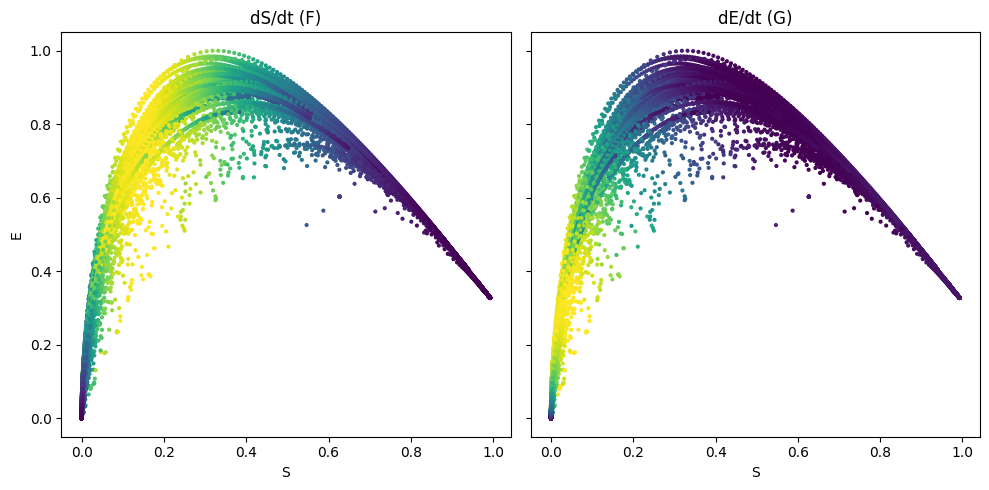

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for cell in range(len(dS)):
    axs[0].scatter(S[:-1, cell], E[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)
    axs[1].scatter(S[:-1, cell], E[:-1, cell], c=dE[:, cell], s=4, alpha=1.,)
axs[0].set_xlabel("S")
axs[1].set_xlabel("S")
axs[0].set_ylabel("E")

axs[0].set_title("dS/dt (F)")
axs[1].set_title("dE/dt (G)")

fig.tight_layout()
plt.show()


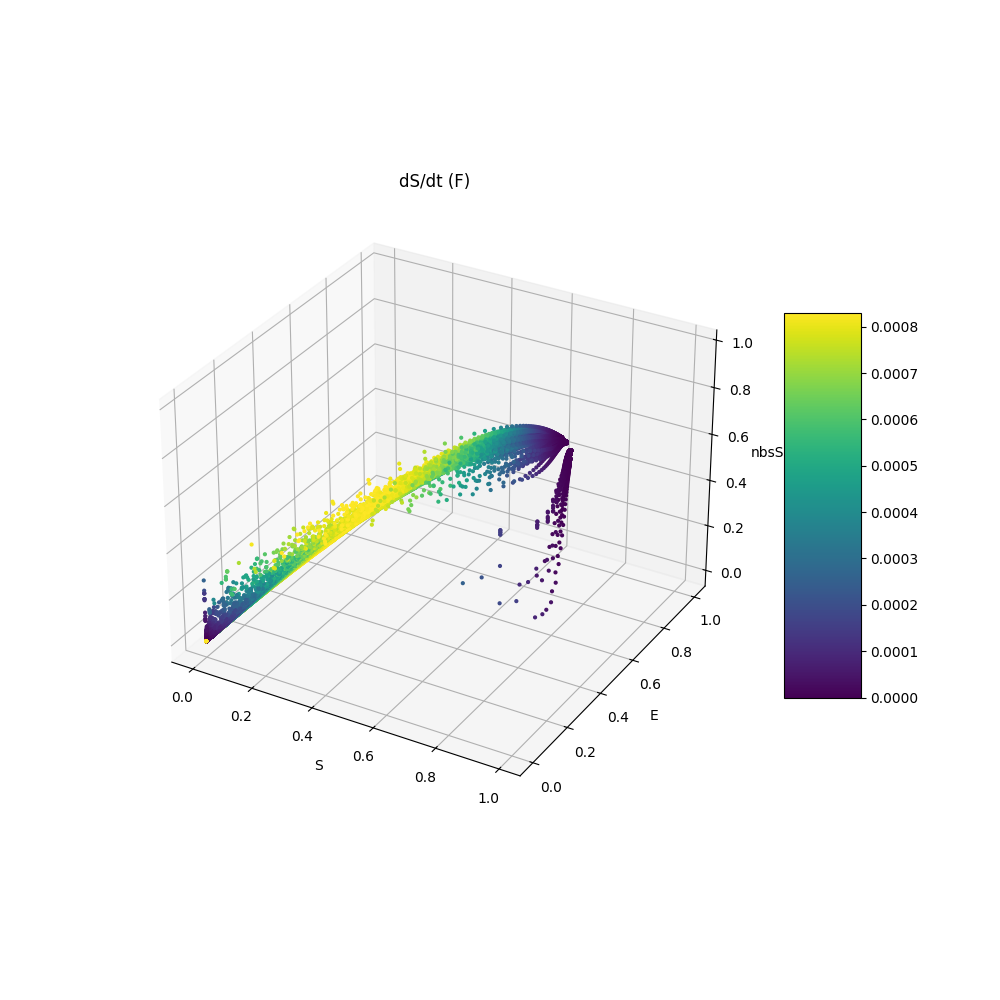

In [117]:
%matplotlib ipympl



from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for cell in range(len(dS)):
    ax.scatter(S[:-1, cell], E[:-1, cell], nbsS[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)

ax.set_xlabel("S")
ax.set_ylabel("E")
ax.set_zlabel("nbsS")
ax.set_title("dS/dt (F)")
plt.colorbar(ax.collections[0], ax=ax, shrink=0.5, aspect=5)
plt.show()

In [306]:
%matplotlib inline


hypervector = np.array([S[:-1], E[:-1], nbsS[:-1],nbsE[:-1]])
allcoeffs = []
for cell in range(len(dS)):
    hypery = dE[:, cell]


    hyperx = hypervector[:,:,cell].T
    hyperx.shape



    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import NearestNeighbors

    def fit_local_hyperplane(X, y, point, k=5):
        nbrs = NearestNeighbors(n_neighbors=k).fit(X)
        distances, indices = nbrs.kneighbors([point])
        
        
        model = LinearRegression().fit(X[indices[0]], y[indices[0]])
        
        return model


    num_points = 100
    sample_indices = np.random.choice(len(hyperx), size=num_points, replace=False)
    anchor_points = hyperx[sample_indices]

    models = []
    for pt in anchor_points:
        model = fit_local_hyperplane(hyperx, hypery, pt, k=20)
        models.append(model)

    coefs = np.array([m.coef_ for m in models])
    allcoeffs.extend(coefs)

allcoeffs = np.array(allcoeffs)

c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\droso

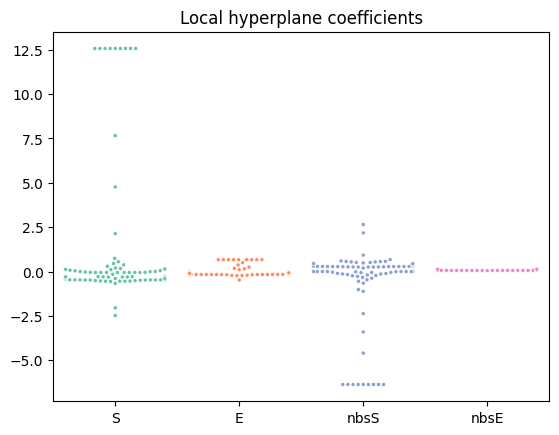

In [307]:

import seaborn as sns
plt.close()
sns.swarmplot(data=coefs, palette="Set2", linewidth=0.5, alpha=1, s=3, edgecolor="white")
plt.title("Local hyperplane coefficients")
names = ["S", "E", "nbsS", "nbsE"]
plt.xticks(ticks=range(len(names)), labels=names, rotation=0)
plt.show()

In [311]:
allcoeffs[np.abs(allcoeffs) > 50] = 0. 

In [309]:
allcoeffs.shape

(20000, 4)

c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\droso

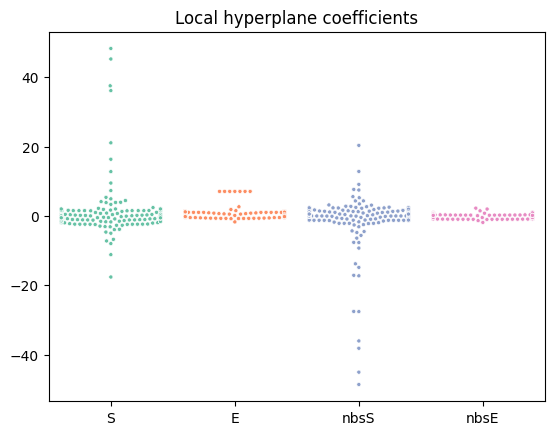

In [312]:
plt.close()
sns.swarmplot(data=allcoeffs[:300], palette="Set2", linewidth=0.5, alpha=1, s=3, edgecolor="white")
plt.title("Local hyperplane coefficients")
names = ["S", "E", "nbsS", "nbsE"]
plt.xticks(ticks=range(len(names)), labels=names, rotation=0)
plt.show()

In [313]:
allcoeffs[1]

array([0.        , 0.66582593, 0.        , 0.12817618])

In [317]:
high = np.mean(allcoeffs >= -1e-11, axis=0)
low = np.mean(allcoeffs <= 1e-11, axis=0)
names = ["S", "E", "nbsS", "nbsE"]
print(names)
print("percentage positive coefficients:", high)
print("percentage negative coefficients:", low)

['S', 'E', 'nbsS', 'nbsE']
percentage positive coefficients: [0.4525  0.3196  0.64395 0.7683 ]
percentage negative coefficients: [0.64655 0.6821  0.4392  0.23175]


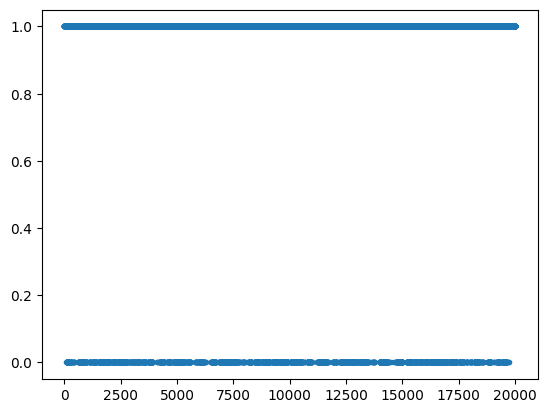

In [326]:
plt.plot((allcoeffs >= -1e-11)[:,3],'.')
plt.show()

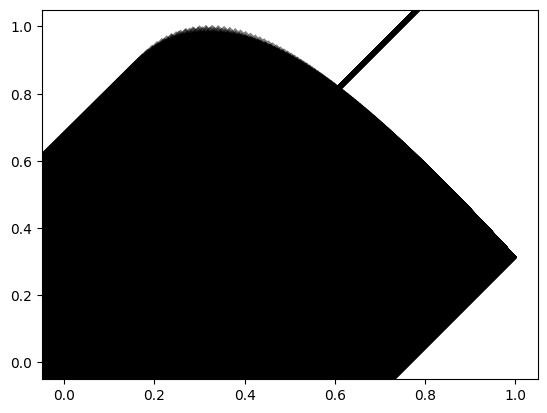

In [70]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# for cell in range(len(dS)):
#     axs[0].scatter(S[:-1, cell], E[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)
#     axs[1].scatter(S[:-1, cell], E[:-1, cell], c=dE[:, cell], s=4, alpha=1.,)
# axs[0].set_xlabel("S")
# axs[1].set_xlabel("S")
# axs[0].set_ylabel("E")

# axs[0].set_title("dS/dt (F)")
# axs[1].set_title("dE/dt (G)")

# fig.tight_layout()
# plt.show()

XX = dS[:].flatten()/np.max(dS[:])*2. - 1.
YY = dE[:].flatten()/np.max(dE[:])*2. - 1.

plt.quiver(S[:-1, :], E[:-1, :], XX, YY, color='k', alpha=0.5, scale=0.1, width=0.01)

In [ ]:
.shape

(200,)

In [49]:
positions

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.14803186, 0.7043009 ],
       [0.70741147, 0.69062161],
       [0.60246526, 0.79582952]])

In [59]:
x = S[:-1].flatten()
y = E[:-1].flatten()


Svalue = dS.flatten()
Evalue = dE.flatten()

positions = np.array([x, y]).T
N = len(positions)
tree = KDTree(positions)


dSdx = np.zeros(N)
dSdy = np.zeros(N)

dEdx = np.zeros(N)
dEdy = np.zeros(N)

for cell in range(N):
    # find a cell 0.01 in each of the four directions
    # find the four nearest neighbors in the KDTree
    testpos = positions[cell]
    dist, idx = tree.query(testpos, k=4)

    local_Svalue = value[idx].mean()
    local_Evalue = Evalue[idx].mean()

    d = np.array([0.01, 0])

    testpos = positions[cell] + d
    dist, idx = tree.query(testpos, k=4)
    test_Svalue = Svalue[idx].mean()
    dSdx[cell] = (test_Svalue - local_Svalue) / 0.01
    test_Evalue = Evalue[idx].mean()
    dEdx[cell] = (test_Evalue - local_Evalue) / 0.01

    
    d = np.array([0.0, 0.01])

    testpos = positions[cell] + d
    dist, idx = tree.query(testpos, k=4)
    test_Svalue = Svalue[idx].mean()
    dSdy[cell] = (test_Svalue - local_Svalue) / 0.01
    test_Evalue = Evalue[idx].mean()
    dEdy[cell] = (test_Evalue - local_Evalue) / 0.01
    
    # testpos = positions[cell] + d
    # dist, idx = tree.query(testpos, k=4)

    # # find the ave


    # plt.scatter(S[:-1, cell], dS[:, cell], c=E[:-1, cell], s=4, alpha=1.,)

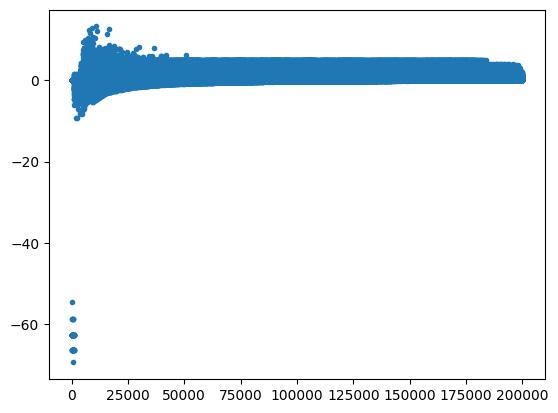

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for plotter in [dSdx, dSdy, dEdx, dEdy]:
    for cell in range(len(plotter)):
        axs[0, 0].scatter(S[:-1, cell], E[:-1, cell], c=plotter[cell], s=4, alpha=1.,)
        axs[0, 1].scatter(S[:-1, cell], E[:-1, cell], c=plotter[cell], s=4, alpha=1.,)
        axs[1, 0].scatter(S[:-1, cell], E[:-1, cell], c=plotter[cell], s=4, alpha=1.,)
        axs[1, 1].scatter(S[:-1, cell], E[:-1, cell], c=plotter[cell], s=4, alpha=1.,)

In [ ]:
plt.plot(dSdx, '.',  )


$$dF/dE = 0$$
$$dF/dS = ?$$
$$dG/dE = ?$$
$$dG/dS = ?$$